# Vodafone Customer Churn Project

### **Project Description**
#### Customer Churn is the percentage of customers that stopped using a companys' product or service during a certain time frame.In business, understanding the primary cause of a customer churn can assist businesses to create a retention strategy to reduce customer churn and as such boost revenue.This project seeks to build a powerful machine learning pipeline that will estimate or predict the likelihood of a customer leaving vodafone or not.

### **Null Hypothesis**: Customers with high monthly charges do not have the tendency to churn

### **Alternate Hypothesis**:Customers with high monthly Charges have the tendency to churn

### **Analytical Questions**
#### 1.  Which payment method is the most popular?
#### 2.  Which internet service was purchased the most?
#### 3.  Which gender recorded the highest churn
#### 4.  Which one of the contract types did the highest churn
#### 5.  Which age group did the highest churn
#### 6.  Does high monthly charges affect the churn rate

In [44]:
# Data manipulation packages
import pandas as pd
import numpy as np
 
#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
 
# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
 
 
# Database connection package
import pyodbc
from dotenv import dotenv_values
 
# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Exploration and Understanding

Load your dataset into a Pandas DataFrame.

In [53]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server_name")
database = environment_variables.get("database_name")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [54]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinP"

In [55]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server 


connection = pyodbc.connect(connection_string)

In [56]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "SELECT * FROM LP2_Telco_churn_first_3000"

First_Churn = pd.read_sql(query, connection)

In [57]:

# Load the third dataset (it's a CSV file named 'LP2_Telco-churn-last-2000.csv')
data_3 = pd.read_csv('LP2_Telco-churn-last-2000.csv')

In [368]:
data_3.describe(include ='object').T

,count,unique,top,freq
customerID,2043,2043,5600-PDUJF,1
gender,2043,2,Male,1022
Partner,2043,2,No,1047
Dependents,2043,2,No,1412
PhoneService,2043,2,Yes,1823
MultipleLines,2043,3,No,987
InternetService,2043,3,Fiber optic,905
OnlineSecurity,2043,3,No,1029
OnlineBackup,2043,3,No,911
DeviceProtection,2043,3,No,923


In [369]:
First_Churn.describe(include ='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [370]:
First_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [371]:
First_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [372]:
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [391]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   bool   
 3   Partner           2043 non-null   bool   
 4   Dependents        2043 non-null   bool   
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   bool   
 7   MultipleLines     2043 non-null   bool   
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   bool   
 10  OnlineBackup      2043 non-null   bool   
 11  DeviceProtection  2043 non-null   bool   
 12  TechSupport       2043 non-null   bool   
 13  StreamingTV       2043 non-null   bool   
 14  StreamingMovies   2043 non-null   bool   
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   bool   


# Step 2: Data Cleaning 

### List of things to do

- `Convert Some Columns Representations to Boolean`
- `Missing Value`


In [58]:
# Convert a column to a numeric type
data_3['TotalCharges'] = pd.to_numeric(data_3['TotalCharges'], errors='coerce', downcast= 'float')


In [59]:
# List of columns to be converted to boolean 
boolean_columns_first_data = ['Partner', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'MultipleLines',
                               'Dependents', 'PhoneService', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'PaperlessBilling']

# Function to convert "Yes", "No", to True and False
def map_yes_no_to_boolean(value):
    return value.lower() == 'yes'

# Iterate through the list and convert corresponding columns in data_3 to boolean type
for column in boolean_columns_first_data:
    data_3[column] = data_3[column].map(map_yes_no_to_boolean)


We have a column with integer values 0 and 1, Yes and No want to convert them to boolean values (`False` and `True`), you can use the `astype` 



In [60]:
# We converted the yes&no to True and Yes 

def map_yes_no_to_bool(value):
    return value.lower()=='yes'

data_3['Churn'] = data_3['Churn'].map(map_yes_no_to_bool)

In [61]:
#Senior column' is the column I  want to convert

data_3['SeniorCitizen'] = data_3['SeniorCitizen'].astype(bool)

##SQL Data set 

In [386]:
# Check for missing values in each column
First_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [62]:
# List of columns to be converted to boolean 
boolean_columns_second_data = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'MultipleLines', 
                               'TechSupport', 'StreamingMovies', 'StreamingTV']

for column in boolean_columns_second_data:
    First_Churn[column] = First_Churn[column].astype(bool)

In [63]:
# Convert the Churn into a boolean Column

First_Churn['Churn'] = First_Churn['Churn'].astype(bool)

In [129]:
# Check for missing values in each column
print(First_Churn.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               1
dtype: int64


In [30]:
# Check for missing values in each column
print(data_3.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64


In [29]:
for column in data_3:
    print(column, data_3[column].nunique())

customerID 2043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1029
TotalCharges 1990
Churn 2


In [392]:
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,True,False,False,6,True,False,DSL,False,...,False,True,False,False,Month-to-month,True,Credit card (automatic),49.50,312.700012,False
1,8292-TYSPY,Male,True,False,False,19,True,False,DSL,False,...,True,True,False,False,Month-to-month,True,Credit card (automatic),55.00,1046.500000,True
2,0567-XRHCU,Female,True,True,True,69,False,False,DSL,True,...,True,False,False,True,Two year,True,Credit card (automatic),43.95,2960.100098,False
3,1867-BDVFH,Male,True,True,True,11,True,True,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.35,834.200012,True
4,2067-QYTCF,Female,True,True,False,64,True,True,Fiber optic,False,...,True,True,True,True,Month-to-month,True,Electronic check,111.15,6953.399902,False


In [437]:
First_Churn['Churn'].unique()

array([False, True, None], dtype=object)

In [13]:
First_Churn['Churn'] = First_Churn['Churn'].astype(bool)

In [14]:
First_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     3000 non-null   bool   
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   bool   
 10  OnlineBackup      3000 non-null   bool   
 11  DeviceProtection  3000 non-null   bool   
 12  TechSupport       3000 non-null   bool   
 13  StreamingTV       3000 non-null   bool   
 14  StreamingMovies   3000 non-null   bool   
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


## Concat the SQL and CSV data


In [64]:
#Merging the SQL and CSV dataset

vodafone_df= pd.concat([First_Churn,data_3])

vodafone_df.to_csv('vodafone_customer_churn.csv')

In [65]:
voda_df= pd.read_csv('vodafone_customer_churn.csv')

`column_to_drop' is the Unnamed & CustomerID`

In [66]:

voda_df = voda_df.drop(columns=['Unnamed: 0'])


In [67]:
voda_df = voda_df.drop(columns=['customerID'])

In [68]:
voda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   bool   
 2   Partner           5043 non-null   bool   
 3   Dependents        5043 non-null   bool   
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   bool   
 6   MultipleLines     5043 non-null   bool   
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   bool   
 9   OnlineBackup      5043 non-null   bool   
 10  DeviceProtection  5043 non-null   bool   
 11  TechSupport       5043 non-null   bool   
 12  StreamingTV       5043 non-null   bool   
 13  StreamingMovies   5043 non-null   bool   
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   bool   
 16  PaymentMethod     5043 non-null   object 


## Data Exploration:


Use descriptive statistics and visualizations to understand the distribution of variables, identify outliers, and get a sense of the data.

<Axes: >

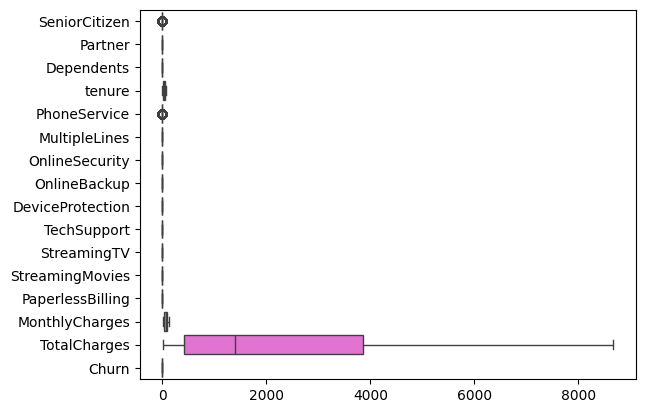

In [69]:
# Boxplot Visualization

sns.boxplot(data=voda_df, orient='h')

 Count Plots for Categorical Columns

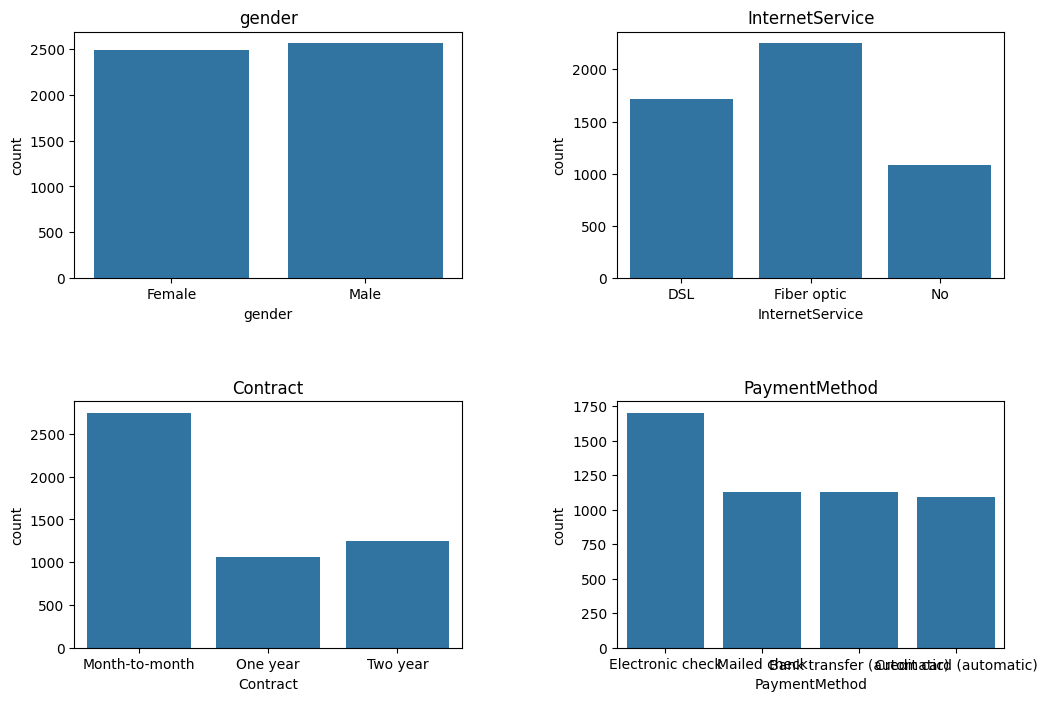

In [427]:
# List of columns containing categorical values
categorical_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

# Set up subplots for better visibility with adjusted size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust vertical and horizontal spacing

# Flatten the 2D axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    # Create a count plot using Seaborn
    sns.countplot(data=voda_df, x=column, ax=axes[i])

    # Add a title to the count plot with the name of the column
    axes[i].set_title(column)

# Hide empty subplots
for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')

# Show the count plots
plt.show()


Histograms for Numerical Columns

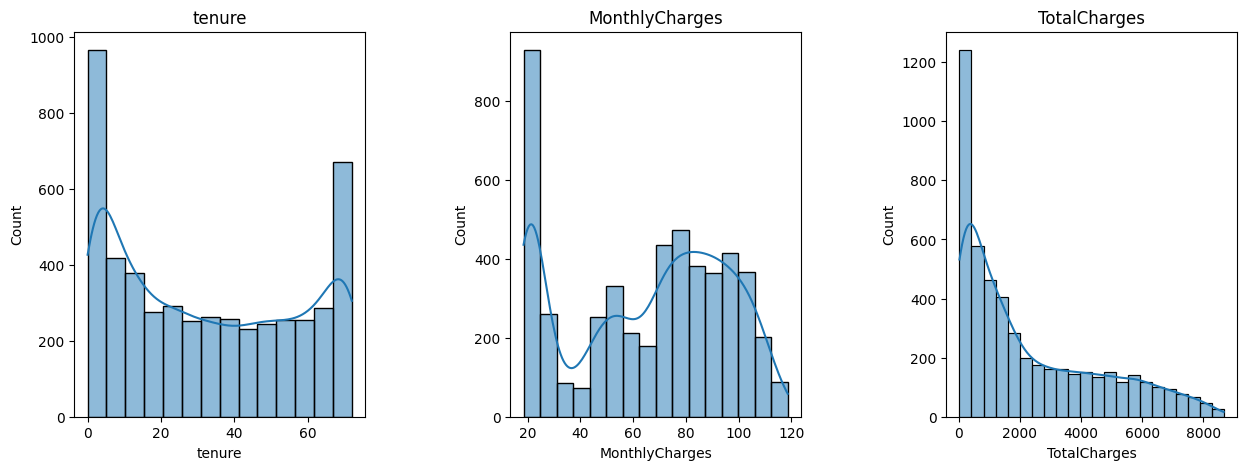

In [189]:

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up subplots for better visibility
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing

# Loop through each numerical column
for i, column in enumerate(numerical_columns):
    # Create a histogram using Seaborn
    sns.histplot(data=voda_df, x=column, kde=True, ax=axes[i])

    # Add a title to the histogram with the name of the column
    axes[i].set_title(column)

# Show the subplots for numerical histograms
plt.show()


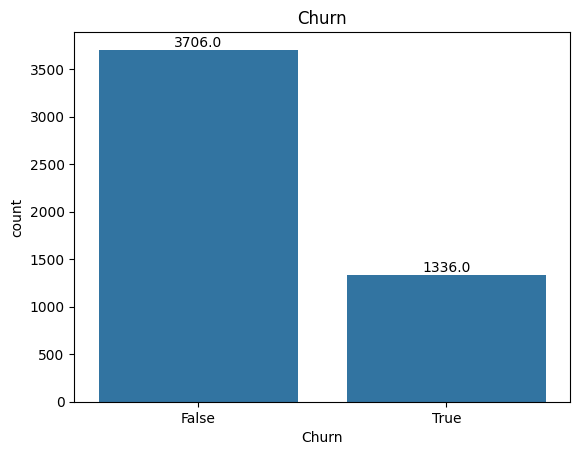

In [197]:

# Create a count plot for the 'Churn' column
sns.countplot(data=voda_df, x='Churn')

# Add count annotations to each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)

# Add a title to the count plot
plt.title('Churn')

# Show the count plot
plt.show()


                Unnamed: 0  SeniorCitizen    tenure  MonthlyCharges  \
Unnamed: 0        1.000000      -0.015405  0.012047       -0.010444   
SeniorCitizen    -0.015405       1.000000  0.004597        0.221780   
tenure            0.012047       0.004597  1.000000        0.240645   
MonthlyCharges   -0.010444       0.221780  0.240645        1.000000   
TotalCharges      0.002839       0.095212  0.826264        0.647007   

                TotalCharges  
Unnamed: 0          0.002839  
SeniorCitizen       0.095212  
tenure              0.826264  
MonthlyCharges      0.647007  
TotalCharges        1.000000  


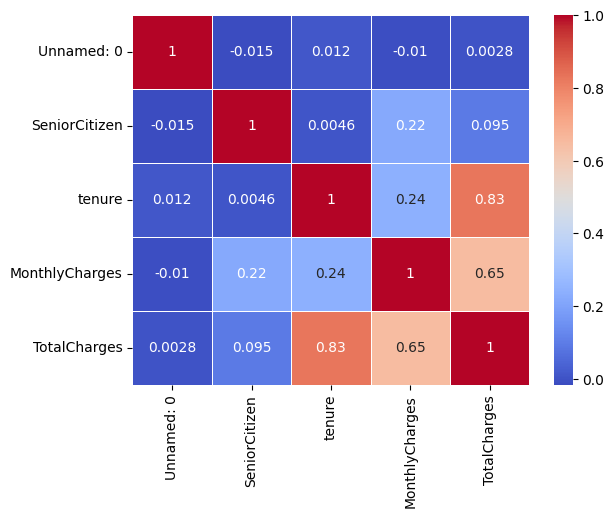

In [191]:
numeric_columns = voda_df.select_dtypes(include=['number']).columns
correlation_matrix = voda_df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

## Answering the Analytical Questions

1.Which payment method is the most popular?

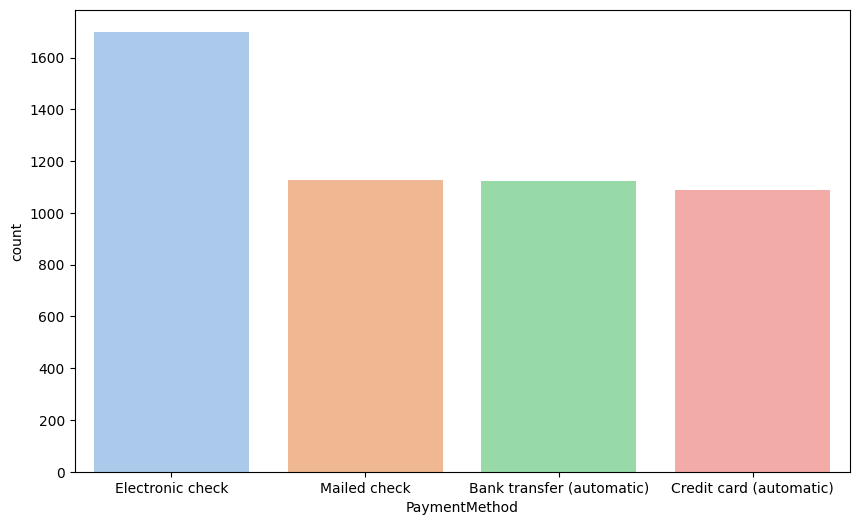

In [212]:

plt.figure(figsize=(10,6))
sns.countplot(data=voda_df, x='PaymentMethod', palette="pastel")
plt.show()

  2.Which internet service was purchased the most?

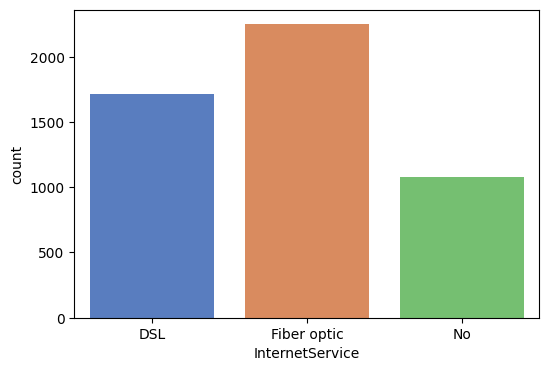

In [329]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='InternetService', palette="muted")
plt.show()

3.Which gender recorded the highest churn

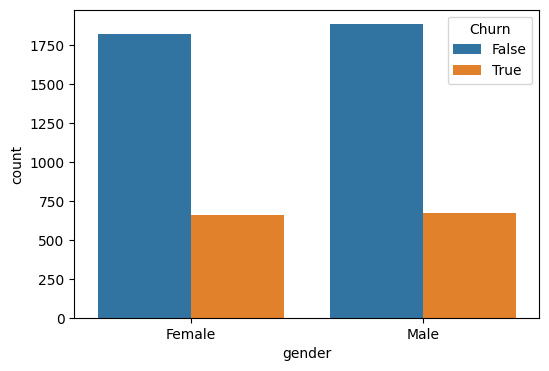

In [214]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='gender', hue="Churn")
plt.show()

4. Which one of the contract types did the highest churn

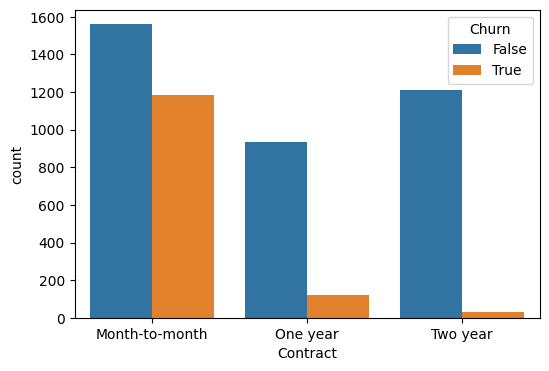

In [215]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='Contract', hue="Churn")
plt.show()

5.Which age group did the highest churn


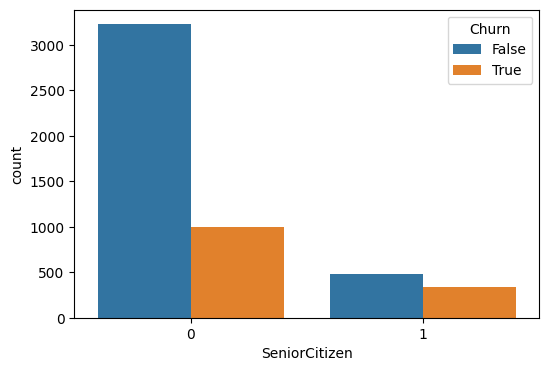

In [216]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='SeniorCitizen', hue="Churn")
plt.show()

## Insights

`It can be seen from the graph that,non senior citizens(0) has the highest churn compared to senior citizens. however,over 80 % of senior citizens churned compared to about 40% of the non senior citizens that churned. we therefore conclude that senior citizens churned the most`

## Hypothesis 



 **Null Hypothesis**: Customers with high monthly charges do not have the tendency to churn

 **Alternate Hypothesis**:Customers with high monthly Charges have the tendency to churn

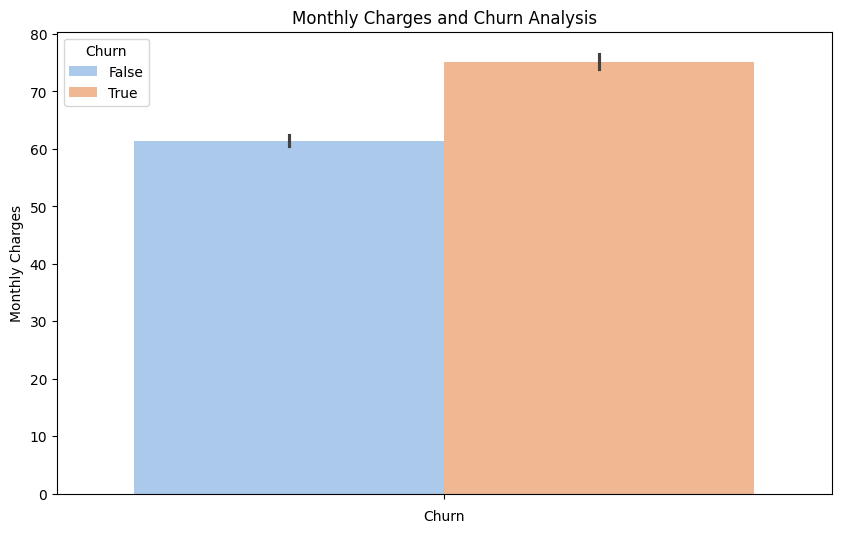

In [217]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=voda_df, y='MonthlyCharges', hue="Churn", palette="pastel")

# Add labels and title
plt.title('Monthly Charges and Churn Analysis')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Churn')

plt.show()


##  `Phase 3 - Data Preparation`

Data Preparation also known as **data preprocessing**, is a crucial phase in the machine learning pipeline. It involves cleaning, transforming, and structuring raw data into a format that is suitable for analysis and model building. Data preparation aims to improve the quality of the data and enhance the performance of machine learning models. This phase lays the foundation for accurate and meaningful analysis and predictions.

- **Train-test split**: Divide the data into training and testing sets for model evaluation.
- **Clean and preprocess data: Handle missing values, outliers, and inconsistencies**.
- **Data Transformation**:
    - Standardization: Scale numerical features to have a mean of 0 and a standard deviation of 1.
    - Normalization: Scale features to a specific range, typically 0 to 1.
    - Log Transformation: Apply log functions to reduce skewness in data distributions.
    - Encoding Categorical Variables: Convert categorical variables into numerical format (e.g., one-hot encoding, label encoding).
- **Feature engineering**
    - Create New Features: Generate new variables based on domain knowledge, interactions, or transformations and choose features that have the most predictive power and discard irrelevant ones.
- **Address class imbalance (if applicable)**: Over-sample, under-sample, or use class weights to balance classes.

In [70]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = voda_df.drop('Churn', axis=1)  #'Churn' is the target variable
y = voda_df['Churn']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4034, 19)
Shape of X_test: (1009, 19)
Shape of y_train: (4034,)
Shape of y_test: (1009,)


### List of things done below

- `Impute missing values with mean`
- `Standardize numeric features`
- `Power transform for skewness`
- `Impute missing values with most frequent`
- `One-hot encode categorical features`

In [71]:
categorical_features = X.select_dtypes(include=['bool', 'object']).columns

categorical_features

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [72]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [73]:

# Numeric pipeline 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),            
    ('scaler', StandardScaler()),                            
    ('power_transformer', PowerTransformer(method="yeo-johnson")) 
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('onehot', OneHotEncoder(handle_unknown='ignore'))       
])

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)




`ENCODING MY TARGET VARIABLE`

In [74]:

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

#using the same label_encoder instance we transfromed the test labels )
y_test_encoded = label_encoder.transform(y_test)


`MODELING`

In [77]:
models = [
    ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('nb_classifier',GaussianNB()),
    ('gb_classifier',GradientBoostingClassifier()),
 
]
 
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
    ])
 
    pipeline.fit(X_train,y_train_encoded)
    
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       742
           1       0.46      0.52      0.49       267

    accuracy                           0.71      1009
   macro avg       0.64      0.65      0.65      1009
weighted avg       0.73      0.71      0.72      1009

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       742
           1       0.67      0.54      0.60       267

    accuracy                           0.81      1009
   macro avg       0.76      0.72      0.73      1009
weighted avg       0.80      0.81      0.80      1009

Report for rf_classifier
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       742
           1       0.63      0.52      0.57       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1

`EVALUATION`

Handling imbalanced dataset 

In [78]:
# using over sampling method on the dataset to balance your dataset
sampler = RandomOverSampler(random_state=42)
X_train_resampled,y_train_resampled = sampler.fit_resample(X_train,y_train_encoded)

After running this code, X_train_resampled and y_train_resampled will contain the training data with a balanced class distribution. 

In [79]:
models = [
    ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('nb_classifier',GaussianNB()),
    ('gb_classifier',GradientBoostingClassifier()),
 
]
 
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
    ])
 
    pipeline.fit(X_train_resampled,y_train_resampled)
    
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       742
           1       0.51      0.54      0.52       267

    accuracy                           0.74      1009
   macro avg       0.67      0.68      0.67      1009
weighted avg       0.74      0.74      0.74      1009

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       742
           1       0.50      0.76      0.60       267

    accuracy                           0.74      1009
   macro avg       0.70      0.74      0.70      1009
weighted avg       0.79      0.74      0.75      1009

Report for rf_classifier
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       742
           1       0.58      0.60      0.59       267

    accuracy                           0.78      1009
   macro avg       0.71      0.72      0.72      1

In [81]:
X.shape

(5043, 19)

`FEATURE SELECTION AND IMPORTANCE`

In [88]:
# Feature selection using SelectKBest with mutual information

selection = SelectKBest(mutual_info_classif,k=10)

In [89]:
# retraining the models with our resampled data
models = [
    ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('nb_classifier',GaussianNB()),
    ('gb_classifier',GradientBoostingClassifier()),
 
]
 
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_selection',selection),
        ('classifier',classifier),
        
    ])
 
    pipeline.fit(X_train_resampled,y_train_resampled)
    
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       742
           1       0.47      0.55      0.51       267

    accuracy                           0.72      1009
   macro avg       0.65      0.66      0.66      1009
weighted avg       0.73      0.72      0.73      1009

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       742
           1       0.52      0.77      0.62       267

    accuracy                           0.75      1009
   macro avg       0.71      0.76      0.72      1009
weighted avg       0.80      0.75      0.76      1009

Report for rf_classifier
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       742
           1       0.55      0.60      0.58       267

    accuracy                           0.77      1009
   macro avg       0.70      0.71      0.71      1

`HYPERPARAMETER GRID`

In [40]:
from sklearn.model_selection import GridSearchCV

# Assuming you have X_train_resampled, y_train_resampled, X_test, y_test_encoded defined
# Also, assuming you have a pipeline defined (with feature selection, preprocessor, and classifier)

# Define the hyperparameter grid for each classifier
param_grid = {
    'tree_classifier__max_depth': [None, 5, 10, 20],
    'svc_classifier__C': [0.1, 1, 10],
    'rf_classifier__n_estimators': [50, 100, 200],
    'nb_classifier__var_smoothing': [1e-9, 1e-8, 1e-7],
    'gb_classifier__n_estimators': [50, 100, 200],
}

# Create a GridSearchCV instance for each classifier
grid_searches = {}
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('feature_selection', selection),
        ('preprocessor', preprocessor),
        ('classifier', classifier),
    ])

    grid_search = GridSearchCV(pipeline, param_grid=param_grid[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    grid_searches[model_name] = grid_search

# Evaluate the best models on the test set
for model_name, grid_search in grid_searches.items():
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f'Best hyperparameters for {model_name}:')
    print(grid_search.best_params_)
    print('\nClassification Report:')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 50)


KeyError: 'tree_classifier'

In [41]:
# decision tree pipeline
decision_tree_balanced= Pipeline([
    ('preprocessor',preprocessor ),
    ('feature_selection',selection),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

decision_tree_balanced.fit(X_train_resampled,y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=7,
                             score_func=<function mutual_info_classif at 0x00000189B3BE6E80>)),
                ('classifier', DecisionTreeClassifier(random_state=42))])